# Photoionization of hydrogen

In this notebook we use a simple python program (`FCF_helper`) specifically designed to calculate the Franck-Condon factors for the photoionization of hydrogen molecules $H_2 \rightarrow H_2^+$. This program operates on the harmonic oscillator approximation level.

Let us first import all the necessary stuff we need later in the notebook:

In [1]:
import numpy as np
from common.utils import plot_spectrum
from common.FCF_helper import FCFSpec

To initialize a `FCFSpec` object we need two integer numbers: `n_0_max` and `n_p_max`. They specify the maximum vibrational states of $H_2$ and $H_2^+$ that we'll look at while calculating the FCFs. We will only consider transitions from the ground vibrational state of $H_2$, i.e. we wil use `n_0_max=0`. Let us set `n_p_max=10` so that we calculate 10 transitions starting from `n_0=0`.

In [2]:
n_0_max = 0
n_p_max = 10

fcfspec = FCFSpec(n_0_max, n_p_max)

Calculate all the FCFs and print the results.

In [4]:
spectrum = fcfspec.spectrum_analysis()
print("n_0\t\t n_p\t\t FCF\t\t Ep-E0")
print(spectrum)

n_0		 n_p		 FCF		 Ep-E0
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.23378957e+05]
 [0.00000000e+00 1.00000000e+00 2.95139079e+00 1.25700957e+05]
 [0.00000000e+00 2.00000000e+00 3.49048846e+00 1.28022957e+05]
 [0.00000000e+00 3.00000000e+00 2.01446220e+00 1.30344957e+05]
 [0.00000000e+00 4.00000000e+00 5.16711333e-01 1.32666957e+05]
 [0.00000000e+00 5.00000000e+00 2.55047939e-02 1.34988957e+05]
 [0.00000000e+00 6.00000000e+00 8.26500159e-03 1.37310957e+05]
 [0.00000000e+00 7.00000000e+00 1.09734335e-02 1.39632957e+05]
 [0.00000000e+00 8.00000000e+00 1.39346082e-03 1.41954957e+05]
 [0.00000000e+00 9.00000000e+00 8.39894919e-05 1.44276957e+05]
 [0.00000000e+00 1.00000000e+01 2.53763959e-04 1.46598957e+05]]


Now, let us plot Franck-Condon factors against the transition energy:

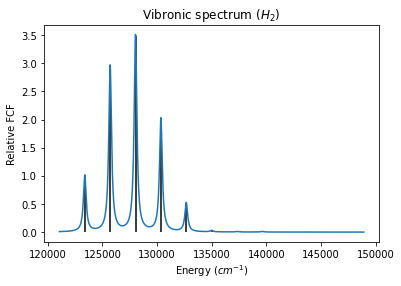

In [5]:
plot_desc = {'title': "Vibronic spectrum ($H_2$)", 'xlabel': "Energy ($cm^{-1}$)", 'ylabel': "Relative FCF"}

x = spectrum[:, 3]
y = spectrum[:, 2]
plot_spectrum(np.vstack([x, y]), plot_desc, gamma=300)

In their paper Berkowitz and Spohr (_Journal of Electron Spectroscopy and Related Phenomena_, **2**(2):143–152 (1973)) have experimentally investigated the photoionization spectrum oh hydrogen. To compare our theoretical results with the experimental results from their paper, it is visually more appealing to convert the energies in our plot to electron volts (since the plot in the cited article is in electron volts).

Note, that to make the plot comparable to the plot of the experimental data we plot the energy axis is reverse (decreasing) order.

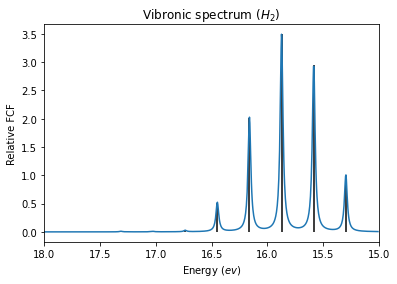

In [6]:
invcm_to_ev = 0.000123984
plot_desc['xlabel'] = "Energy ($ev$)"
x_ev = invcm_to_ev * x
plot_spectrum(np.vstack([x_ev, y]), plot_desc, xlim=(18, 15), gamma=0.03, points=1000)

For your convenience, here is the plot from the expermintal investigation. As you can see our theoretical resulsts are inline with the experimental results: The positions of the peaks and the relative intensities are the same.

<img src="figures/Berkowitz.png" align="left" style="width: 400px;"/>

To sum up, we have used a very simple and minimalistic numerical program to calculate the Franck-Condon factors for the simplest molecule - hydrogen. Despite the usage of harmonic oscillation approximation, we can see that the positions of the peaks have been correctly predicted, and the relative intensities of the peaks is in line with the experimental data. E.g. the strongest peak is the third one counting from right (with energy a bit less than $16 ev$), in both the experimental data and the theoretically calculated one.

The harmonic oscillation approximation turns out to be a good enough theoretical model for the Hydrogen photoionization. Is this a good approximation for other molecules as well? Let us discuss this question in subsequent notebooks as well.